<a href="https://colab.research.google.com/github/omer38/DeepLearning/blob/main/Regression_Exercise01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ömer Tuğrul Neural Network Regression models

## Linear Regression Example

1- Create your own regression dataset:
  I choose the function y = 10X + 26

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [2]:
y = 10*X + 26
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-974, -934, -894, -854, -814, -774, -734, -694, -654, -614, -574,
       -534, -494, -454, -414, -374, -334, -294, -254, -214, -174, -134,
        -94,  -54,  -14,   26,   66,  106,  146,  186,  226,  266,  306,
        346,  386,  426,  466,  506,  546,  586,  626,  666,  706,  746,
        786,  826,  866,  906,  946,  986], dtype=int32)>

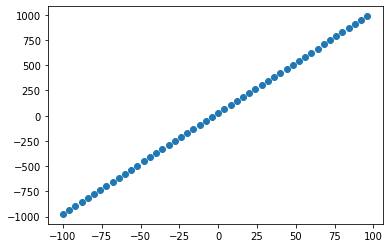

In [3]:
plt.scatter(X,y)

In [4]:
# Split the data into train and test sets.
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

X_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56], dtype=int32)>

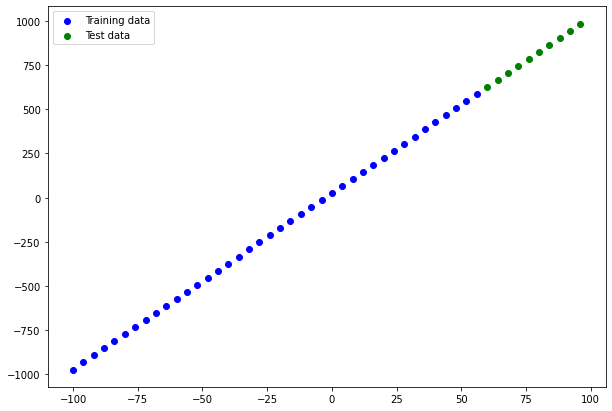

In [6]:
# Now plot the training and the test data

plt.figure(figsize=(10,7))
# Plot the training data in blue
plt.scatter(X_train, y_train, c='b', label = "Training data")
plt.scatter(X_test, y_test, c='g', label = "Test data")
# Show the legends
plt.legend()

In [21]:
from tensorflow.python import metrics
# Create a model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=200,verbose = 0)

In [22]:
y_preds_1 = model_1.predict(X_test)
abs(y_test-y_preds_1)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 56,  16,  24,  64, 104, 144, 184, 224, 264, 304],
       [101,  61,  21,  19,  59,  99, 139, 179, 219, 259],
       [146, 106,  66,  26,  14,  54,  94, 134, 174, 214],
       [192, 152, 112,  72,  32,   8,  48,  88, 128, 168],
       [237, 197, 157, 117,  77,  37,   3,  43,  83, 123],
       [282, 242, 202, 162, 122,  82,  42,   2,  38,  78],
       [327, 287, 247, 207, 167, 127,  87,  47,   7,  33],
       [372, 332, 292, 252, 212, 172, 132,  92,  52,  12],
       [418, 378, 338, 298, 258, 218, 178, 138,  98,  58],
       [463, 423, 383, 343, 303, 263, 223, 183, 143, 103]], dtype=int32)>

In [23]:
# Create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds_1):
  """
  Plots training data, test daya and compares predictions to the ground truth labels
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_labels,c='b',label="Training Data")
  #Plot testing data in green
  plt.scatter(test_data,test_labels,c='g',label="Testing Data")
  #Plot models prediction in red
  plt.scatter(test_data,predictions,c='r',label="Predictions")
  #Show the legend
  plt.legend();

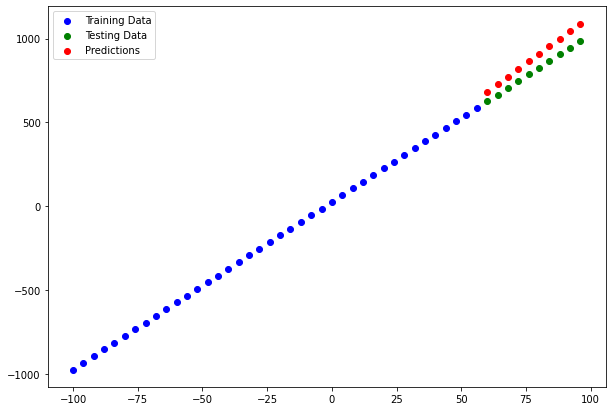

In [24]:
plot_predictions()

In [20]:
# As I see in the plot, if I increase the epoch model will predict better. So I go back to code block(16) and improve it
# I saw that 400 epochs is better than 600.
# So, in the second model I will adjust epochs to 450 and change the optimizer to Adam.

In [25]:
# Create the model_2

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=450,verbose = 1)

Epoch 1/450
2/2 [==============================] - 0s 6ms/step - loss: 411.8109 - mae: 411.8109
Epoch 2/450
2/2 [==============================] - 0s 4ms/step - loss: 411.5006 - mae: 411.5006
Epoch 3/450
2/2 [==============================] - 0s 4ms/step - loss: 411.1896 - mae: 411.1896
Epoch 4/450
2/2 [==============================] - 0s 4ms/step - loss: 410.8809 - mae: 410.8809
Epoch 5/450
2/2 [==============================] - 0s 6ms/step - loss: 410.5694 - mae: 410.5694
Epoch 6/450
2/2 [==============================] - 0s 6ms/step - loss: 410.2769 - mae: 410.2769
Epoch 7/450
2/2 [==============================] - 0s 3ms/step - loss: 409.9503 - mae: 409.9503
Epoch 8/450
2/2 [==============================] - 0s 5ms/step - loss: 409.6442 - mae: 409.6442
Epoch 9/450
2/2 [==============================] - 0s 3ms/step - loss: 409.3349 - mae: 409.3349
Epoch 10/450
2/2 [==============================] - 0s 2ms/step - loss: 409.0175 - mae: 409.0175
Epoch 11/450
2/2 [=====================

In [26]:
y_preds_2 = model_2.predict(X_test)
abs(y_test-y_preds_2)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[195, 235, 275, 315, 355, 395, 435, 475, 515, 555],
       [167, 207, 247, 287, 327, 367, 407, 447, 487, 527],
       [138, 178, 218, 258, 298, 338, 378, 418, 458, 498],
       [110, 150, 190, 230, 270, 310, 350, 390, 430, 470],
       [ 82, 122, 162, 202, 242, 282, 322, 362, 402, 442],
       [ 53,  93, 133, 173, 213, 253, 293, 333, 373, 413],
       [ 25,  65, 105, 145, 185, 225, 265, 305, 345, 385],
       [  4,  36,  76, 116, 156, 196, 236, 276, 316, 356],
       [ 32,   8,  48,  88, 128, 168, 208, 248, 288, 328],
       [ 61,  21,  19,  59,  99, 139, 179, 219, 259, 299]], dtype=int32)>

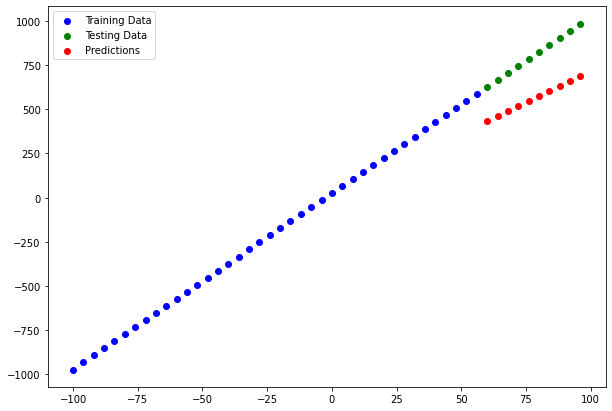

In [27]:
plot_predictions(predictions=y_preds_2)

In [28]:
# Adam is not the correct optimizer so, change it back to the SGD

# Create the model_3

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit the model
model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500,verbose = 1)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 401.5051 - mae: 401.5051
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 380.3453 - mae: 380.3453
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 344.1514 - mae: 344.1514
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 254.7028 - mae: 254.7028
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 77.8414 - mae: 77.8414
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 225.0071 - mae: 225.0071
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 110.5208 - mae: 110.5208
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 113.0110 - mae: 113.0110
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 80.7420 - mae: 80.7420
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 106.9363 - mae: 106.9363
Epoch 11/500
2/2 [=========================

In [29]:
y_preds_3 = model_3.predict(X_test)
abs(y_test-y_preds_3)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[166, 126,  86,  46,   6,  34,  74, 114, 154, 194],
       [218, 178, 138,  98,  58,  18,  22,  62, 102, 142],
       [270, 230, 190, 150, 110,  70,  30,  10,  50,  90],
       [322, 282, 242, 202, 162, 122,  82,  42,   2,  38],
       [374, 334, 294, 254, 214, 174, 134,  94,  54,  14],
       [426, 386, 346, 306, 266, 226, 186, 146, 106,  66],
       [478, 438, 398, 358, 318, 278, 238, 198, 158, 118],
       [530, 490, 450, 410, 370, 330, 290, 250, 210, 170],
       [582, 542, 502, 462, 422, 382, 342, 302, 262, 222],
       [634, 594, 554, 514, 474, 434, 394, 354, 314, 274]], dtype=int32)>

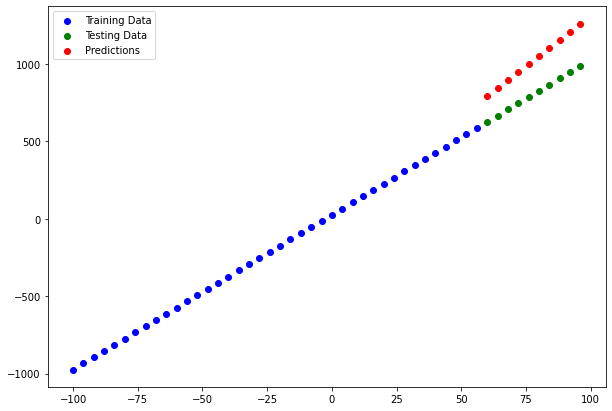

In [30]:
plot_predictions(predictions=y_preds_3)

In [35]:
y_preds_5 = model_5.predict(X_test)
abs(y_test-y_preds_5)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 69,  29,  11,  51,  91, 131, 171, 211, 251, 291],
       [114,  74,  34,   6,  46,  86, 126, 166, 206, 246],
       [160, 120,  80,  40,   0,  40,  80, 120, 160, 200],
       [206, 166, 126,  86,  46,   6,  34,  74, 114, 154],
       [252, 212, 172, 132,  92,  52,  12,  28,  68, 108],
       [297, 257, 217, 177, 137,  97,  57,  17,  23,  63],
       [343, 303, 263, 223, 183, 143, 103,  63,  23,  17],
       [389, 349, 309, 269, 229, 189, 149, 109,  69,  29],
       [434, 394, 354, 314, 274, 234, 194, 154, 114,  74],
       [480, 440, 400, 360, 320, 280, 240, 200, 160, 120]], dtype=int32)>

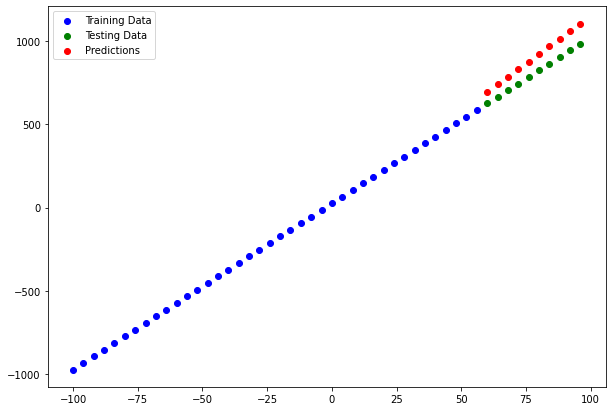

In [36]:
plot_predictions(predictions=y_preds_5)

## Another Regression Example

In [37]:
import tensorflow as tf 
import tensorflow_datasets as tfds
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression 

In [38]:
# From sklearn create random Regression model

X , y  = make_regression(n_samples = 200 , 
                               n_features = 10 , 
                               n_targets = 1)

X.shape , y.shape

((200, 10), (200,))

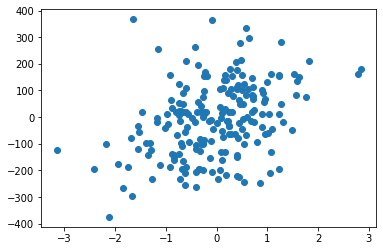

In [39]:
# Visualize the dataset

plt.scatter(X[:, 0] , y)

In [42]:

# Set the random seed 
tf.random.set_seed(42)

# Create a model using the Sequential API 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fitting the model 
model.fit(X , y , epochs = 10)

Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 111.5124 - mae: 111.5124
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 111.5009 - mae: 111.5009
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 111.4898 - mae: 111.4898
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 111.4786 - mae: 111.4786
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 111.4675 - mae: 111.4675
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 111.4570 - mae: 111.4570
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 111.4458 - mae: 111.4458
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 111.4351 - mae: 111.4351
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 111.4240 - mae: 111.4240
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 111.4136 - mae: 111.4136


In [43]:
# Building the model again with 4 Dense layers 
tf.random.set_seed(42)

# Build the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10) , 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
]) 

# Compile the model
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fit the model 
model.fit(X , y , epochs= 10)

Epoch 1/10
7/7 [==============================] - 0s 3ms/step - loss: 111.5142 - mae: 111.5142
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 111.4432 - mae: 111.4432
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 111.3772 - mae: 111.3772
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 111.3049 - mae: 111.3049
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 111.2328 - mae: 111.2328
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 111.1495 - mae: 111.1495
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 111.0550 - mae: 111.0550
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 110.9432 - mae: 110.9432
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 110.8160 - mae: 110.8160
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 110.6644 - mae: 110.6644


In [44]:
# Split the data into training and test sets (80-20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Checking the shapes of our splitted data 
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((160, 10), (160,), (40, 10), (40,))

In [45]:
# Now build the model from scratch  
tf.random.set_seed(42)

# Model 1 with one layer and fewer units 
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model 
model_1.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model only our training data 
model.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 109.5783 - mae: 109.5783
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 109.4184 - mae: 109.4184
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 109.2401 - mae: 109.2401
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 109.0300 - mae: 109.0300
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 108.7824 - mae: 108.7824
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 108.5140 - mae: 108.5140
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 108.2091 - mae: 108.2091
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 107.8509 - mae: 107.8509
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 107.4444 - mae: 107.4444
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 106.9737 - mae: 106.9737
Epoch 11/100
5/5 [=====================

In [46]:
# Evaluate the test datas
model_1.evaluate(X_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 115.2844 - mae: 115.2844


[115.28437805175781, 115.28437805175781]

In [48]:
# Get the predictions of the model and look at the differences
y_preds_1 = model_1.predict(X_test)
abs(y_test-y_preds_1)

array([[157.3410292 , 125.42039222, 105.94592602, ...,  36.59443136,
         21.53796179,  63.17131127],
       [157.21648988, 125.29585291, 105.8213867 , ...,  36.71897067,
         21.41342247,  63.29585059],
       [156.01336056, 124.09272359, 104.61825738, ...,  37.9221    ,
         20.21029315,  64.49897991],
       ...,
       [155.289731  , 123.36909402, 103.89462781, ...,  38.64572956,
         19.48666359,  65.22260948],
       [156.72432822, 124.80369125, 105.32922504, ...,  37.21113234,
         20.92126081,  63.78801225],
       [156.40609615, 124.48545917, 105.01099296, ...,  37.52936441,
         20.60302874,  64.10624433]])

In [52]:
def plot_predictions(train_data,
                     train_labels, 
                     test_data,
                     test_labels, 
                     predictions):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

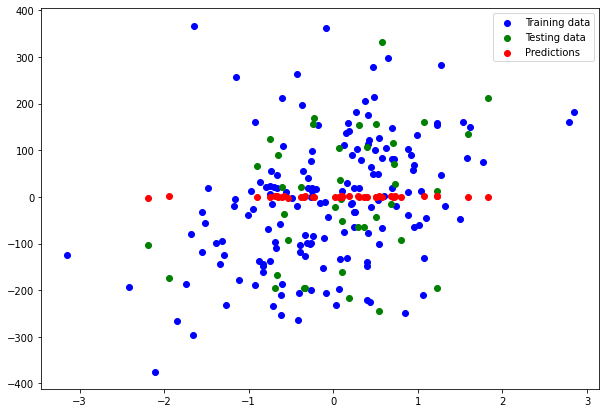

In [54]:
plot_predictions(X_train[:,0] , y_train ,  
                 X_test[:,0] , y_test , y_preds_1)

In [55]:
# Building our model with 3 layers and with more hidden units 

tf.random.set_seed(42)

# Creating the model 
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(50), 
  tf.keras.layers.Dense(1) # Should be always one 
])

# Compile the model 
model_3.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['mae'])

# Fit the model 
model_3.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 110.2819 - mae: 110.2819
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 109.8014 - mae: 109.8014
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 109.3384 - mae: 109.3384
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 108.8215 - mae: 108.8215
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 108.2271 - mae: 108.2271
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 107.5795 - mae: 107.5795
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 106.7813 - mae: 106.7813
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 105.8397 - mae: 105.8397
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 104.7142 - mae: 104.7142
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 103.3520 - mae: 103.3520
Epoch 11/100
5/5 [=====================

In [56]:
model_3.evaluate(X_test , y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.2588 - mae: 0.2588


[0.25877055525779724, 0.25877055525779724]

In [57]:
# Making predictions 
y_preds_3 = model_3.predict(X_test)
y_preds_3.shape

(40, 1)

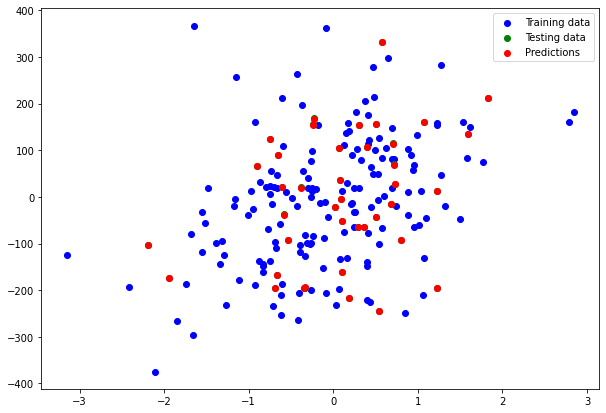

In [58]:
plot_predictions(X_train[: , 0] , y_train , 
                 X_test[: , 0] , y_test , 
                 y_preds_3)

## Boston House Price Prediction
From tensorflow dataset
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data

In [64]:
import pandas as pd

# Get the training and test data
(X_train , y_train) , (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing_npz' , 
                                                                           test_split = 0.2 , seed = 42)


In [60]:
X_train.shape ,X_test.shape , y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [61]:
# Build a model

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)#output layer
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history = model_1.fit(X_train,y_train,epochs = 300)

Epoch 1/300
13/13 [==============================] - 1s 2ms/step - loss: 67.5498 - mae: 67.5498
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 24.3902 - mae: 24.3902
Epoch 3/300
13/13 [==============================] - 0s 2ms/step - loss: 11.0051 - mae: 11.0051
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 8.7134 - mae: 8.7134
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 8.0325 - mae: 8.0325
Epoch 6/300
13/13 [==============================] - 0s 2ms/step - loss: 8.3708 - mae: 8.3708
Epoch 7/300
13/13 [==============================] - 0s 2ms/step - loss: 7.5760 - mae: 7.5760
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 6.3508 - mae: 6.3508
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 6.3399 - mae: 6.3399
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 8.7520 - mae: 8.7520
Epoch 11/300
13/13 [==============================] -

In [62]:
model_1.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 3.6862 - mae: 3.6862


[3.686244249343872, 3.686244249343872]

Text(0.5, 0, 'epochs')

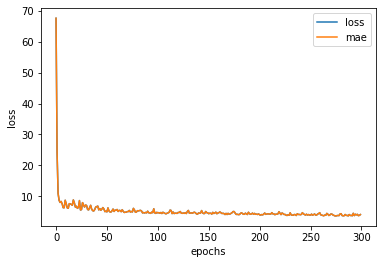

In [65]:
# Plotting the loss Vs Epoch 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [66]:
y_preds_1 = model_1.predict(X_test)

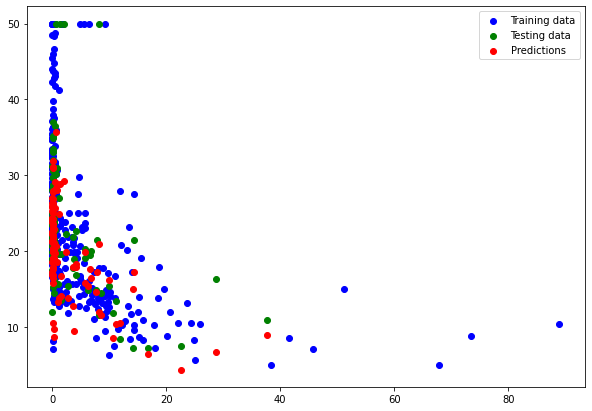

In [67]:
plot_predictions(X_train[: , 0] , y_train , 
                 X_test[: , 0] , y_test , 
                 y_preds_1)

In [68]:
# Not so bad it can be improven by changing layer,epochs,optimizer etc.